In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from sympy import *
from sympy.abc import x

In [2]:
def acept_reject(x_o, x_f, f_max, function, N):
    X=[]
    cdf=[]
    np.random.seed(29072000)
    for i in range(N):
        x = np.random.uniform(x_o,x_f)
        
        b = np.random.uniform(0,f_max)
        y = function(x)

        if b <= y:
            cdf.append(b)
            X.append(x)
    
    return X, cdf

In [3]:
def function(x):
    alpha= 0.1
    beta=0.2
    a=x_o
    b=x_f
    return (1+alpha*x+beta*x**2)/(b-a+(alpha/2)*(b**2-a**2)+(beta/3)*(b**3-a**3))

In [4]:
x_o=-3;x_f=3;N=100000;function=function;f_max = 0.35
X,cdf = acept_reject(x_o, x_f, f_max, function, N)

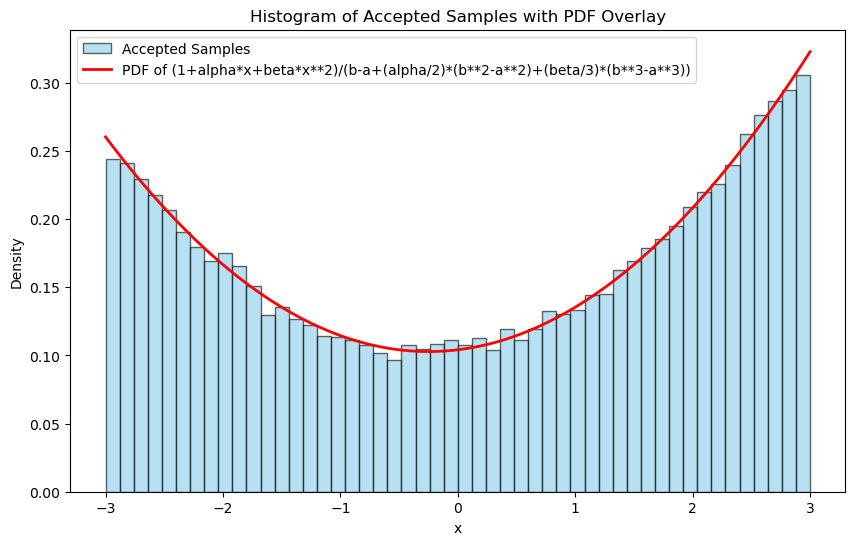

In [5]:
# Generar el histograma con la PDF superpuesta
plt.figure(figsize=(10, 6))

# Histograma de las muestras aceptadas
plt.hist(X, bins=50, density=True, color="skyblue", edgecolor="black", alpha=0.6, label="Accepted Samples")

# Valores de x para graficar la PDF teórica
x_vals = np.linspace(x_o, x_f, N)
pdf_vals = function(x_vals)
result, error = quad(function, x_o, x_f)
plt.plot(x_vals, pdf_vals/result, color="red", linewidth=2, label="PDF of (1+alpha*x+beta*x**2)/(b-a+(alpha/2)*(b**2-a**2)+(beta/3)*(b**3-a**3))")  # Normalización

# Etiquetas y título
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Histogram of Accepted Samples with PDF Overlay")
plt.legend()
plt.show()